<a href="https://colab.research.google.com/github/SvetlanaShkryleva/image-processing/blob/main/Practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ 2
1. Зашумить изображение при помощи шума гаусса, постоянного шума.
2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
3. Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

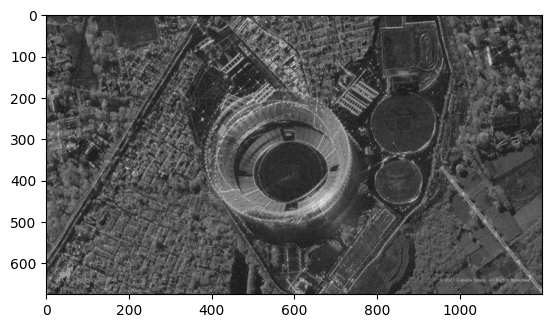

In [4]:
plt.imshow(image_gray, cmap="gray")

In [8]:
# Gaussian noise
mean = 0
stddev = 110
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  93,  87, ...,   0, 255, 143],
       [ 68,  30,  24, ..., 115,   7, 122],
       [ 30,   0,  63, ..., 139, 159,   0],
       ...,
       [  0,   0, 150, ...,  56, 128, 146],
       [ 47,  19,  35, ...,  49,   0,  89],
       [157, 175,   0, ...,  28,   0, 186]], dtype=uint8)

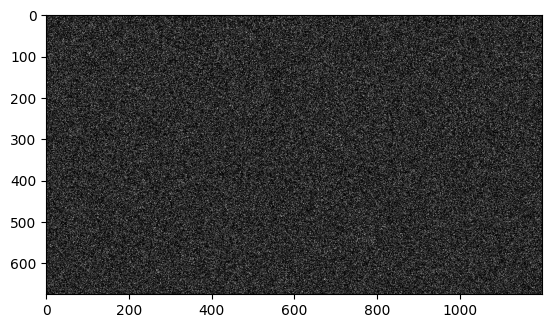

In [9]:
plt.imshow(noise_gauss, cmap="gray")

In [11]:
image_noise_gauss = image_gray + noise_gauss

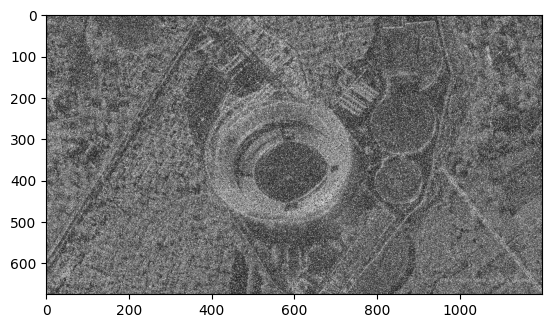

In [12]:
plt.imshow(image_noise_gauss, cmap="gray")

In [13]:
# Постоянный шум
a = 110
b = 0
mid = (a+b)/2

mean1 = mid
stdev1 = a-mid
noise_constant = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_constant, mean1, stdev1)

array([[ 54,   0,  56, ...,  15,  46,  18],
       [ 40,  25,   0, ..., 104,  61,   0],
       [ 66,   0,  17, ..., 102,  27,  32],
       ...,
       [ 43,  22,  68, ...,  90,  36,  91],
       [ 32, 174,   9, ..., 137,   0,  67],
       [122,  29, 155, ...,  72,   0, 108]], dtype=uint8)

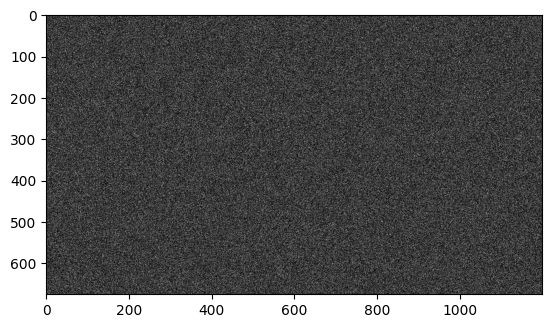

In [14]:
plt.imshow(noise_constant, cmap="gray")

In [16]:
image_noise_constant = image_gray + noise_constant

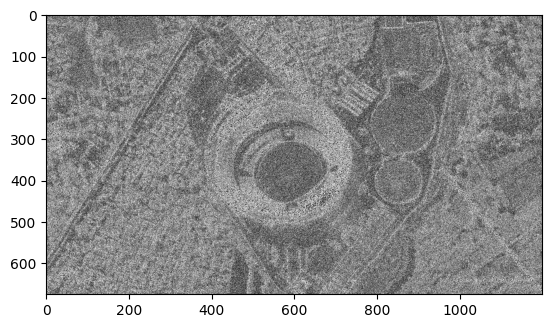

In [17]:
plt.imshow(image_noise_constant, cmap="gray")

In [19]:
# Шум соль-перец
noise_sp =  np.random.randint(0, 110, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise_sp == 0)
ones_pixel = np.where(noise_sp == 100)

In [21]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [22]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

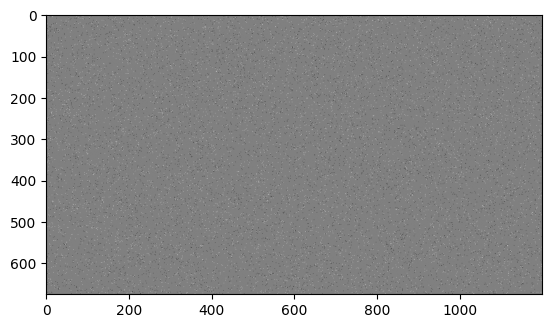

In [23]:
plt.imshow(bg_image, cmap="gray")

In [24]:
image_noise_sp = image_gray + noise_sp

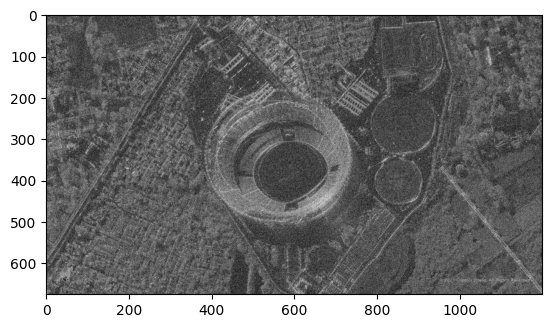

In [25]:
plt.imshow(image_noise_sp, cmap="gray")

In [ ]:
# Медианный фильтр

In [26]:
from skimage.metrics import structural_similarity, mean_squared_error

In [28]:
# Сравнение: зашумлённое (шум Гаусса) и исходное изображение
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim_gauss, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim_gauss)

3560.8253543209876 0.1557391446141593


In [30]:
# Сравнение: зашумлённое (постоянный шум) и исходное изображение
mse_constant = mean_squared_error(image_gray, image_noise_constant)
(ssim_constant, diff) = structural_similarity(image_gray, image_noise_constant, full=True)
print(mse_constant, ssim_constant)

5424.705882716049 0.1374055615157786


In [31]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [32]:
image_constant_median = cv2.medianBlur(image_noise_constant, 3)

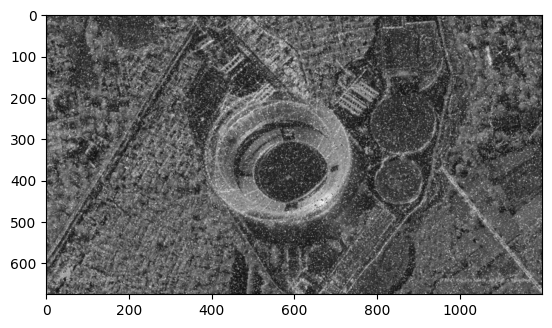

In [33]:
plt.imshow(image_gauss_median, cmap="gray")

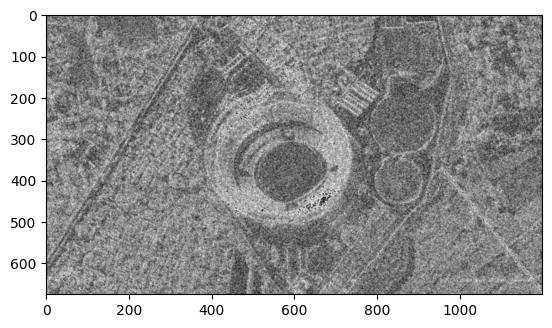

In [34]:
plt.imshow(image_constant_median, cmap="gray")

In [36]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, медианный фильтр) изображение
mse_gauss_median_cleared = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median_cleared, diff) = structural_similarity(image_gray, image_gauss_median, full=True)
print(mse_gauss_median_cleared, ssim_gauss_median_cleared)

721.8047679012345 0.45252965865521555


In [37]:
# Сравнение: исходное и отфильтрованное (постоянный шум, медианный фильтр) изображение
mse_constant_median_cleared = mean_squared_error(image_gray, image_constant_median)
(ssim_constant_median_cleared, diff) = structural_similarity(image_gray, image_constant_median, full=True)
print(mse_constant_median_cleared, ssim_constant_median_cleared)

3282.55484691358 0.31034677926915794


In [ ]:
# Фильтр Гаусса

In [38]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [39]:
image_constant_gauss = cv2.GaussianBlur(image_noise_constant,(5,5),0)

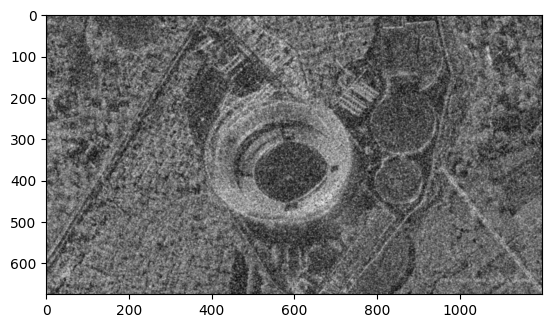

In [40]:
plt.imshow(image_gauss_gauss, cmap="gray")

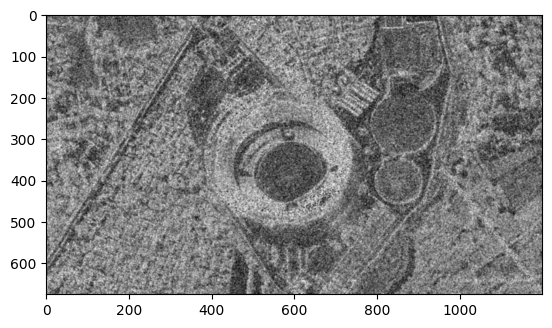

In [41]:
plt.imshow(image_constant_gauss, cmap="gray")

In [42]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_gauss_cleared = mean_squared_error(image_gray, image_gauss_gauss)
(ssim_gauss_gauss_cleared, diff) = structural_similarity(image_gray, image_gauss_gauss, full=True)
print(mse_gauss_gauss_cleared, ssim_gauss_gauss_cleared)

1215.3907469135802 0.4335653598273596


In [43]:
# Сравнение: исходное и отфильтрованное (постоянный шум, фильтр Гаусса) изображение
mse_constant_gauss_cleared = mean_squared_error(image_gray, image_constant_gauss)
(ssim_constant_gauss_cleared, diff) = structural_similarity(image_gray, image_constant_gauss, full=True)
print(mse_constant_gauss_cleared, ssim_constant_gauss_cleared)

3201.172534567901 0.3933396778079497


In [ ]:
# Билатериальный фильтр (на примере гауссовского шума)

In [44]:
image_gauss_bilat_1 = cv2.bilateralFilter(image_noise_gauss,49,150,150)
image_gauss_bilat_2 = cv2.bilateralFilter(image_noise_gauss,25,150,150)
image_gauss_bilat_3 = cv2.bilateralFilter(image_noise_gauss,9,150,150)
image_gauss_bilat_4 = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [45]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_1 = mean_squared_error(image_gray, image_gauss_bilat_1)
(ssim_gauss_bilat_cleared_1, diff) = structural_similarity(image_gray, image_gauss_bilat_1, full=True)
print(mse_gauss_bilat_cleared_1, ssim_gauss_bilat_cleared_1)

1276.4784148148149 0.28208590717465293


In [47]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_2 = mean_squared_error(image_gray, image_gauss_bilat_2)
(ssim_gauss_bilat_cleared_2, diff) = structural_similarity(image_gray, image_gauss_bilat_2, full=True)
print(mse_gauss_bilat_cleared_2, ssim_gauss_bilat_cleared_2)

1195.101748148148 0.2946838228484982


In [49]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_3 = mean_squared_error(image_gray, image_gauss_bilat_3)
(ssim_gauss_bilat_cleared_3, diff) = structural_similarity(image_gray, image_gauss_bilat_3, full=True)
print(mse_gauss_bilat_cleared_3, ssim_gauss_bilat_cleared_3)

1072.9989037037037 0.40314681143816194


In [50]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_4 = mean_squared_error(image_gray, image_gauss_bilat_4)
(ssim_gauss_bilat_cleared_4, diff) = structural_similarity(image_gray, image_gauss_bilat_4, full=True)
print(mse_gauss_bilat_cleared_4, ssim_gauss_bilat_cleared_4)

1294.904750617284 0.2997724018322105


In [ ]:
# Фильтр нелокальных средних (на примере гауссовского шума)

In [51]:
image_gauss_nlm_1 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
image_gauss_nlm_2 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 120)
image_gauss_nlm_3 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 2)

In [52]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_1 = mean_squared_error(image_gray, image_gauss_nlm_1)
(ssim_gauss_nlm_cleared_1, diff) = structural_similarity(image_gray, image_gauss_nlm_1, full=True)
print(mse_gauss_nlm_cleared_1, ssim_gauss_nlm_cleared_1)

3555.479448148148 0.15595160793840587


In [53]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_2 = mean_squared_error(image_gray, image_gauss_nlm_2)
(ssim_gauss_nlm_cleared_2, diff) = structural_similarity(image_gray, image_gauss_nlm_2, full=True)
print(mse_gauss_nlm_cleared_2, ssim_gauss_nlm_cleared_2)

1337.9208790123457 0.2459726515457333


In [54]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_3 = mean_squared_error(image_gray, image_gauss_nlm_3)
(ssim_gauss_nlm_cleared_3, diff) = structural_similarity(image_gray, image_gauss_nlm_3, full=True)
print(mse_gauss_nlm_cleared_3, ssim_gauss_nlm_cleared_3)

3560.8253543209876 0.1557391446141593


In [ ]:
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [ ]:
# На примере шума Гаусса

In [ ]:
# image_gauss_median (медианный)

In [55]:
print(mse_gauss_median_cleared, ssim_gauss_median_cleared)

721.8047679012345 0.45252965865521555


In [ ]:
# image_gauss_gauss (гауссовский)

In [56]:
print(mse_gauss_gauss_cleared, ssim_gauss_gauss_cleared)

1215.3907469135802 0.4335653598273596


In [ ]:
# image_gauss_bilat_3 (билатериальный)

In [57]:
print(mse_gauss_bilat_cleared_3, ssim_gauss_bilat_cleared_3)

1072.9989037037037 0.40314681143816194


In [ ]:
# image_gauss_nlm_2 (нелокальных средних)

In [58]:
print(mse_gauss_nlm_cleared_2, ssim_gauss_nlm_cleared_2)

1337.9208790123457 0.2459726515457333


In [ ]:
# Вывод: image_gauss_median (медианный) - лучший